##### Lack of Robustness of the Markowitz procedure and the GMV portfolio
Although the promise of the MArkowitz procedure is exciting, it tneds to fall apart in practice. The problem is that we rearely know Expected Returns and Expected Covariance in advance. Our estimates almost certainly contain some estimation error and we will see that the procedure is highly sensitive to those errors, which tend to get exaggerated in the portfolio.

To this, let's start by loading up our data as usual.

In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import portfolio_management_lib as port

ind = port.get_ind_returns()
data_need = ind["1996":"2000"]
er = port.annualize_rets(data_need, "Monthly")
cov = data_need.cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/joe/Study/portfolio_management_prac/lib/portfolio_management_lib.py:237: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


In [28]:
l = ["Food", "Steel"]
import numpy as np
port.msr(
    er.loc[l],
    cov.loc[l, l],
    0.1
    )

array([0.75040362, 0.24959638])

Let's look at the returns of the two assets that dictated those weights

In [29]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

Now we assume that we had a really good estimator and we were off by only a fraction of a percent in our estimate and we had estimated a return of 11 and 12 percent respectively for Food and Steel.

In [30]:
port.msr(
    expected_return=np.array([0.11, 0.12]),
    cov=cov.loc[l, l],
    riskfree_rate = 0.1
    )

array([0.57930354, 0.42069646])

We see that even a small change in the estimate causes a major change in the weights. What if we were off by around 1% to 2% in each estimate 10% and 13% instead of the return of 11.6% and 11.5%?

In [31]:
port.msr(
    expected_return = np.array([.10, .13]),
    cov = cov.loc[l, l],
    riskfree_rate = 0.1
)

array([0., 1.])

In [32]:
port.msr(
    expected_return = np.array([.13, .10]),
    cov = cov.loc[l, l],
    riskfree_rate = 0.1
)

array([1., 0.])

##### Avoiding Estimating Returns
Let's look at the Efficient Frontier one more time, and plot the Efficient Frontier again.

<Axes: xlabel='V'>

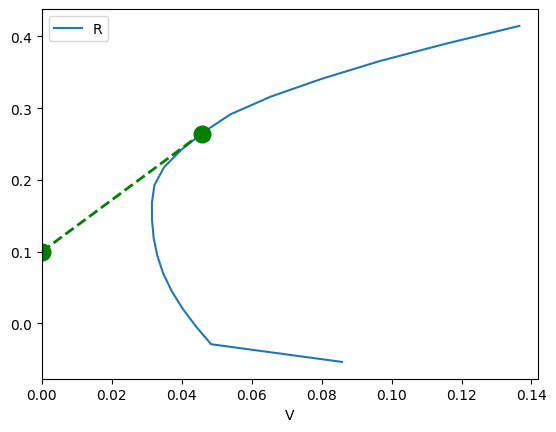

In [39]:
port.plot_ef(er, cov, show_cml=True, show_ew= False, riskfree_rate=0.1)

One way to avoid this estimation game is to skip the entire process and just rely on native diversification, which means that hold all stocks with equal weight. We can add teh EW portfolio to the plot by enhancing the `plot_ef` function as follows.

<Axes: xlabel='V'>

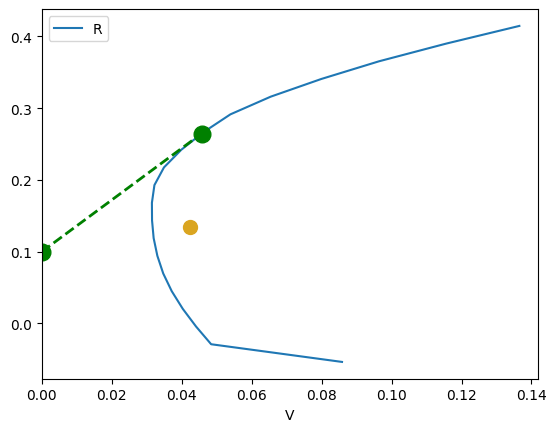

In [25]:
port.plot_ef(er, cov, riskfree_rate=0.1)

Researchers have shown that the EW portfolio is a remarkably good portfolio to hold. In fact, there is overshelming support for the idea that it is a far better portfolio to hold than a cap-weighted equivalent. We will examine this in later sections, but as we can see, the EW portfolio is far inside the Efficient Frontier, but it requires no esitmation whatsoever.

However there is another point on the efficient frontier that is very interesting. This is the nose of the hull, which is the portolio of lowest volatility across all possible portfolios. This is called the Minimum Volatility or the Global Minimum Volatility or GMV portfolio.

But how do we find the weights of the GMV portfolio?

The interesting thing about it is that if you assume that all returns are the same, the optimizer cannot improve the Sharpe Ratio through raising returns, and so it must do so my lowering volatility. This means that if we just skip any returns estimation and assume all returns have the return, we'd get the weights of the GMV portfolio.

``` Python
def gmv(cov):
    """
    Returns the weights of the Global Minimum Volatility portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)
```

and we can add that to the plot as follows:
``` Python
    if show_gmv:
        weight_gmv = gmv(cov)
        ret_gmv = portfolio_rets(weight_gmv, expected_return)
        vol_gmv = portfolio_vol(weight_gmv, cov)

        # add EW
        ax.plot(
            [vol_gmv],
            [ret_gmv],
            color = "midnight_blue",
            marker = "o",
            markersize = 10
        )
```

<Axes: xlabel='V'>

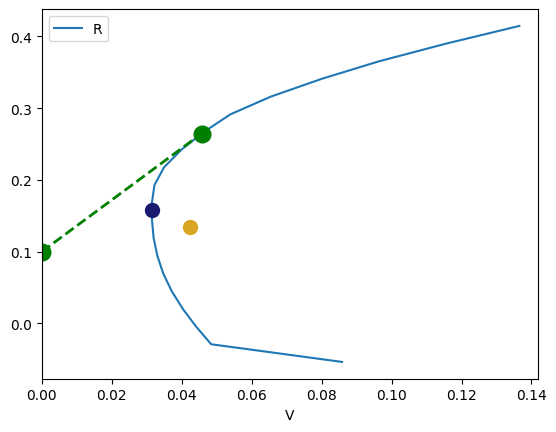

In [43]:
port.plot_ef(
    er,
    cov,
)